# XAI and DataDrift 01

- 연구노트, 데이터 드리프트 과제, JPark
- 2025-07-09
- with Gemini 2.5 Flash
- XAI 도구를 활용하여 데이터 드리프트 검출/진단/학습 방향 재수립  

## 예제

- 데이터 드리프트의 다양한 측면(감지, 경고, 원인 분석, 진단, 재학습 방향성 제시, 모델 아키텍처 조정)에 대한 Python 예제

-----

### 데이터 드리프트 해결을 위한 XAI 활용 예제

이 예제들은 Jupyter Notebook 환경에서 실행하기 적합하며, 
각 섹션은 드리프트 해결 프로세스의 특정 단계를 시뮬레이션합니다. 
실제 시나리오에서는 데이터 드리프트 감지 및 분석에 훨씬 더 정교한 통계적 방법과 모니터링 시스템이 사용될 수 있습니다.

#### 가정:

  * 모델은 이미 학습되어 있습니다.
  * `initial_data.csv`는 모델 학습 시 사용된 초기 데이터입니다.
  * `new_data.csv`는 프로덕션 환경에서 수집된 새로운 데이터입니다.
  * 두 데이터셋 모두 'feature\_1', 'feature\_2', 'feature\_3'와 'target' 컬럼을 포함합니다.
  * 드리프트를 시뮬레이션하기 위해 `new_data.csv`에서 'feature\_1'의 분포를 변경합니다.

<!-- end list -->

-----

### 예제 설명 및 XAI의 역할

1.  **모델 학습 및 초기 성능 확인:**

      * 기존 데이터를 사용하여 모델을 학습하고 초기 성능(정확도)을 측정합니다. 이는 이후 새로운 데이터에 대한 성능과 비교하기 위한 기준점이 됩니다.

2.  **데이터 드리프트 감지 (Feature Drift):**

      * **도구:** `scipy.stats.ks_2samp` (Kolmogorov-Smirnov test)
      * **XAI의 역할:** 통계적 검정은 드리프트의 **존재 여부**를 알려줍니다. 특정 특성의 분포가 유의미하게 변했는지 P-value를 통해 판단합니다. 모델의 새로운 데이터에 대한 성능 하락은 드리프트가 모델에 **영향을 미 미치고 있음**을 경고합니다.

3.  **XAI를 통한 드리프트 원인 분석 및 진단:**

      * **SHAP을 이용한 특성 중요도 변화 분석:**
          * **도구:** `shap.TreeExplainer`, `shap.summary_plot`
          * **XAI의 역할:** 모델이 초기 학습 데이터에서 중요하다고 판단했던 특성들이 새로운 데이터에서도 여전히 중요한지, 혹은 그 중요도가 어떻게 변했는지 **정량적/시각적으로 비교**합니다. 만약 특정 특성('feature\_1'처럼)의 중요도 순위나 절대적인 SHAP 값이 크게 변했다면, 해당 특성의 분포가 변했고, 이 변화가 모델의 예측에 영향을 미치고 있음을 의미합니다. 이는 단순한 분포 변화를 넘어 **모델 관점에서의 영향력 변화**를 보여주므로 핵심 원인 진단에 필수적입니다.
      * **LIME을 이용한 지역적 예측 설명 변화 분석:**
          * **도구:** `lime.lime_tabular.LimeTabularExplainer`
          * **XAI의 역할:** 개별 예측 수준에서 **어떤 특성들이 해당 예측에 기여하는 방식이 변했는지**를 파악합니다. 초기 데이터의 특정 샘플과 새로운 데이터의 유사한 샘플에 대해 LIME 설명을 생성하고 비교함으로써, 모델이 특정 데이터 포인트에 대해 판단하는 방식이 달라졌는지 시각적으로 확인할 수 있습니다. 이는 드리프트가 모델의 지역적인 의사결정 패턴에 어떻게 영향을 미 미치는지 이해하는 데 도움을 줍니다.

4.  **재학습 방향성 제시 및 모델 아키텍처 조정 검토:**

      * **도구:** `matplotlib.pyplot`, `seaborn` (분포 시각화), XAI 분석 결과에 기반한 전문가 지식
      * **XAI의 역할:** 앞서 SHAP, LIME 등을 통해 드리프트의 원인이 'feature\_1'과 같은 특정 특성의 분포 변화 때문임을 **명확히 진단**했으므로, 이를 바탕으로 모델 재학습의 **구체적인 방향성**을 제시할 수 있습니다.
          * **새로운 데이터 수집 및 전처리:** 드리프트된 특성에 초점을 맞춰 새로운 데이터를 수집하고, 그 분포에 맞게 전처리 파이프라인을 조정하는 것이 합리적인 재학습 방향입니다.
          * **모델 아키텍처 조정:** 만약 XAI 분석 결과가 단순히 특성 분포 변화를 넘어, 특성 간의 **복잡한 상호작용 방식의 변화**를 시사한다면, 현재 모델의 표현 능력이 부족하다고 판단하고 더 복잡한 모델이나 적응형 학습(Adaptive Learning) 기법 도입을 고려할 수 있습니다. 예를 들어, SHAP 상호작용 플롯에서 예상치 못한 새로운 상호작용 패턴이 나타났다면, 현재 모델이 이를 제대로 포착하지 못할 가능성이 있습니다.

-----

이 예제는 데이터 드리프트 해결에 XAI가 어떻게 통합될 수 있는지에 대한 기본적인 아이디어를 제공합니다. 실제 프로덕션 시스템에서는 이러한 XAI 분석이 자동화된 모니터링 시스템의 일부로 작동하여, 드리프트 발생 시 자동으로 경고를 발행하고 더 심층적인 분석을 유도하게 됩니다.

가상 데이터셋 생성 중...
데이터셋 생성 완료.

--- 1. 모델 학습 및 초기 성능 확인 ---
초기 학습 데이터 정확도: 1.0000

--- 2. 데이터 드리프트 감지 (Feature Drift) ---

각 특성의 분포 변화 (Kolmogorov-Smirnov Test):
  특성 'feature_1': KS 통계량=0.6880, p-value=0.0000
    -> 경고: 'feature_1'에서 데이터 드리프트가 의심됩니다! (p < 0.05)
  특성 'feature_2': KS 통계량=0.0670, p-value=0.4307
  특성 'feature_3': KS 통계량=0.0530, p-value=0.7239

새로운 데이터에 대한 모델 정확도: 1.0000

--- 3. XAI를 통한 드리프트 원인 분석 및 진단 ---

3.1. SHAP을 이용한 특성 중요도 변화 분석:

초기 데이터 특성 중요도 (SHAP 평균 절대값):
feature_2    0.039378
feature_1    0.027798
feature_3    0.008751
dtype: float64

새로운 데이터 특성 중요도 (SHAP 평균 절대값):
feature_2    0.024039
feature_1    0.022850
feature_3    0.006312
dtype: float64


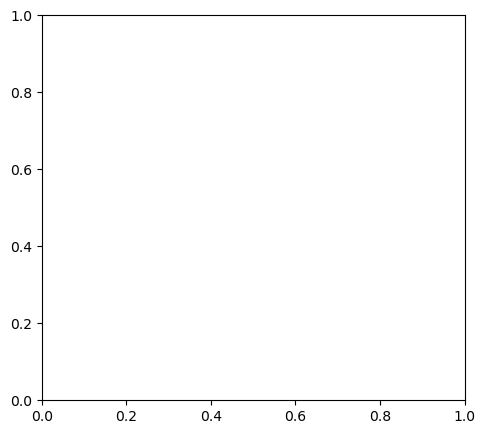

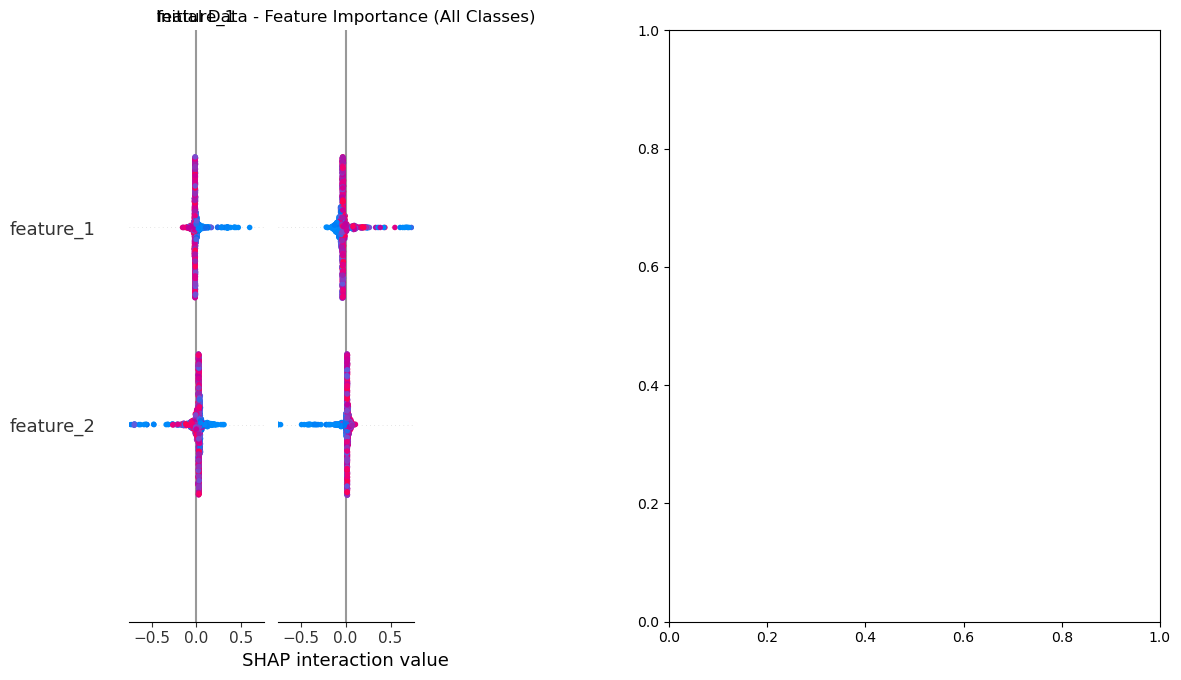

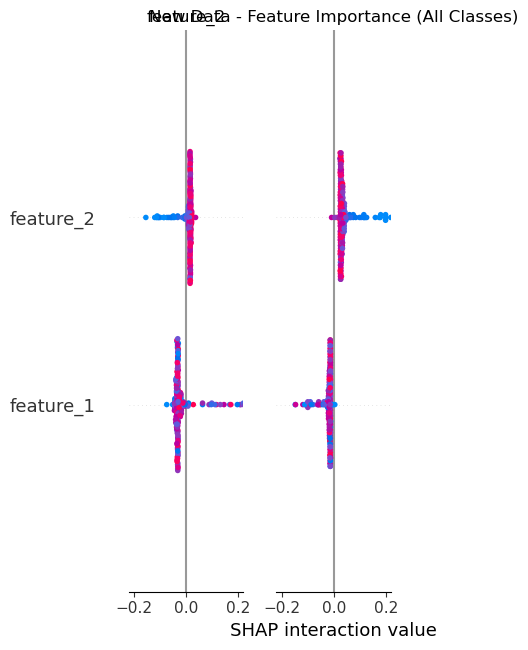


SHAP 값 변화를 통해 'feature_1'의 중요도가 상대적으로 낮아지거나 패턴이 변했음을 시사합니다.

3.2. LIME을 이용한 지역적 예측 설명 변화 분석:

초기 데이터 샘플 (인덱스 0) LIME 설명:

새로운 데이터 샘플 (인덱스 0) LIME 설명:

LIME 설명을 통해 개별 예측에서 중요하게 작용하는 특성들이 달라졌음을 확인합니다.

--- 4. 재학습 방향성 제시 및 모델 아키텍처 조정 검토 ---


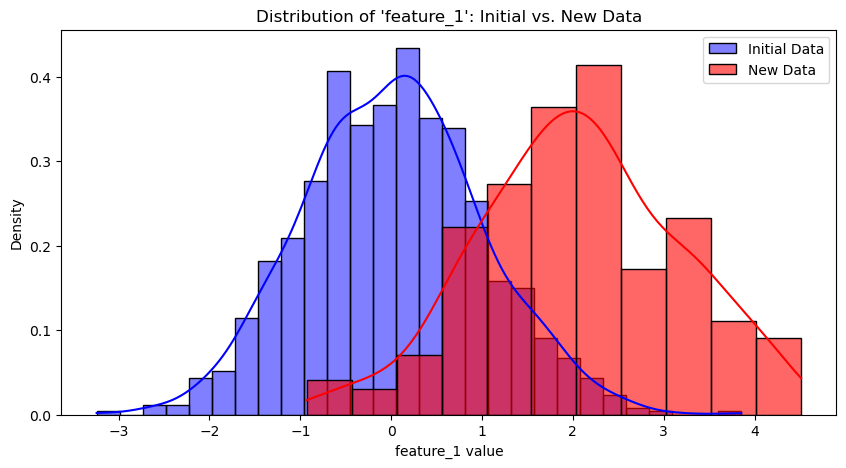


시각화를 통해 'feature_1'의 분포가 초기 데이터와 새로운 데이터에서 크게 달라졌음을 명확히 확인할 수 있습니다.

**재학습 방향성 제시:**
  - 'feature_1'의 분포 변화가 가장 두드러지므로, 해당 특성에 대한 **새로운 데이터를 수집하여 모델을 재학습**하는 것이 시급합니다.
  - 가능하다면, 새로운 데이터 분포를 반영할 수 있도록 **데이터 전처리 파이프라인을 업데이트**하는 것을 고려합니다.
  - 데이터 드리프트 모니터링 시스템을 강화하여 드리프트 발생 시 **자동 알림 및 재학습 트리거**를 설정합니다.

**모델 아키텍처 조정 검토:**
  - 현재 RandomForest 모델은 비교적 드리프트에 강건할 수 있지만, 만약 드리프트가 'feature_1'과 다른 특성들 간의 복잡한 **상호작용 관계 변화**를 포함한다면, 모델이 이를 포착하지 못할 수 있습니다.
  - SHAP 상호작용 분석 등에서 새로운 상호작용 패턴이 발견되면, **비선형성을 더 잘 학습할 수 있는 모델 (예: Gradient Boosting, 신경망)**으로의 전환을 고려할 수 있습니다.
  - 또는 **어댑티브 러닝(Adaptive Learning) 기법**을 도입하여 모델이 지속적으로 새로운 데이터에 적응하도록 할 수 있습니다.
  - 드리프트가 발생한 특성을 명확히 인지했으므로, 해당 특성에 가중치를 주거나, 해당 특성의 변화에 민감하게 반응하도록 모델 구조를 변경하는 연구를 진행할 수 있습니다.

데이터 드리프트 해결을 위한 XAI 활용 예제 완료.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ks_2samp # Kolmogorov-Smirnov test for drift detection
import shap # Make sure SHAP is updated to a recent version (>=0.40.0)
import matplotlib.pyplot as plt
import seaborn as sns
import lime
import lime.lime_tabular
import warnings
# 오류 수정: IPython.core.display 대신 IPython.display에서 display 임포트
from IPython.display import display, HTML # HTML도 함께 임포트하여 필요 시 사용 가능


warnings.filterwarnings('ignore') # 경고 메시지 무시

# --- 가상의 데이터셋 생성 ---
print("가상 데이터셋 생성 중...")
np.random.seed(42)

# 초기 학습 데이터 (initial_data.csv)
num_initial_samples = 1000
initial_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=num_initial_samples),
    'feature_2': np.random.normal(loc=5, scale=2, size=num_initial_samples),
    'feature_3': np.random.normal(loc=10, scale=3, size=num_initial_samples),
    'target': np.random.randint(0, 2, size=num_initial_samples)
})
# 타겟과 특성 간의 약한 관계 추가 (분류 문제 시뮬레이션)
initial_data['target'] = (initial_data['feature_1'] + initial_data['feature_2'] * 0.5 > 0).astype(int)
initial_data.to_csv('initial_data.csv', index=False)

# 새로운 데이터 (new_data.csv) - feature_1에 드리프트 발생
num_new_samples = 200
new_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=num_new_samples), # 드리프트 발생! (평균 0 -> 2)
    'feature_2': np.random.normal(loc=5, scale=2, size=num_new_samples),
    'feature_3': np.random.normal(loc=10, scale=3, size=num_new_samples),
    'target': np.random.randint(0, 2, size=num_new_samples)
})
new_data['target'] = (new_data['feature_1'] + new_data['feature_2'] * 0.5 > 0).astype(int)
new_data.to_csv('new_data.csv', index=False)

print("데이터셋 생성 완료.")

# --- 1. 모델 학습 및 초기 성능 확인 ---
print("\n--- 1. 모델 학습 및 초기 성능 확인 ---")
initial_df = pd.read_csv('initial_data.csv')
X_initial = initial_df[['feature_1', 'feature_2', 'feature_3']]
y_initial = initial_df['target']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_initial, y_initial)

initial_pred = model.predict(X_initial)
print(f"초기 학습 데이터 정확도: {accuracy_score(y_initial, initial_pred):.4f}")

# --- 2. 데이터 드리프트 감지 (Feature Drift) ---
print("\n--- 2. 데이터 드리프트 감지 (Feature Drift) ---")
drift_threshold_p_value = 0.05

print("\n각 특성의 분포 변화 (Kolmogorov-Smirnov Test):")
for feature in X_initial.columns:
    statistic, p_value = ks_2samp(X_initial[feature], new_data[feature])
    print(f"  특성 '{feature}': KS 통계량={statistic:.4f}, p-value={p_value:.4f}")
    if p_value < drift_threshold_p_value:
        print(f"    -> 경고: '{feature}'에서 데이터 드리프트가 의심됩니다! (p < {drift_threshold_p_value})")

X_new = new_data[['feature_1', 'feature_2', 'feature_3']]
y_new = new_data['target']

new_pred = model.predict(X_new)
print(f"\n새로운 데이터에 대한 모델 정확도: {accuracy_score(y_new, new_pred):.4f}")
if accuracy_score(y_new, new_pred) < accuracy_score(y_initial, initial_pred) * 0.9:
    print("    -> 경고: 모델 성능이 크게 하락했습니다. 드리프트 가능성 높음!")

# --- 3. XAI를 통한 드리프트 원인 분석 및 진단 ---
print("\n--- 3. XAI를 통한 드리프트 원인 분석 및 진단 ---")

# SHAP을 이용한 특성 중요도 비교
print("\n3.1. SHAP을 이용한 특성 중요도 변화 분석:")

explainer = shap.TreeExplainer(model)

# SHAP Explanation 객체로 SHAP 값 계산 (더 견고한 방법)
# X_initial은 Pandas DataFrame이므로 X_initial.values로 넘겨주는 것이 더 안전할 수 있습니다.
# 또는 X_initial.iloc[:100]처럼 일부 샘플만 사용해서 계산 속도를 높일 수도 있습니다.
shap_values_initial_exp = explainer(X_initial)
shap_values_new_exp = explainer(X_new)

# 전역 특성 중요도 (평균 절대 SHAP 값) 추출
# shap.Explanation 객체에서 .values는 (num_samples, num_features) 또는 (num_samples, num_features, num_classes)
# 형태를 가질 수 있습니다. np.abs().mean()을 두 번 사용하여 (num_features,) 형태로 만듭니다.
# 'axis=0'은 샘플, 'axis=1'은 특성을 의미합니다.
# 만약 shap_values_initial_exp.values가 3차원 (샘플, 특성, 클래스)이라면, np.mean(..., axis=(0,2)) 로 샘플과 클래스 차원을 한번에 평균 낼 수 있습니다.
# RandomForestClassifier의 경우, shap_values_initial_exp.values는 (num_samples, num_features, num_classes) 형태입니다.
mean_abs_shap_initial = np.abs(shap_values_initial_exp.values).mean(axis=(0, 2))
mean_abs_shap_new = np.abs(shap_values_new_exp.values).mean(axis=(0, 2))


shap_importance_initial = pd.Series(mean_abs_shap_initial, index=X_initial.columns).sort_values(ascending=False)
shap_importance_new = pd.Series(mean_abs_shap_new, index=X_new.columns).sort_values(ascending=False)

print("\n초기 데이터 특성 중요도 (SHAP 평균 절대값):")
print(shap_importance_initial)
print("\n새로운 데이터 특성 중요도 (SHAP 평균 절대값):")
print(shap_importance_new)

# 시각화로 비교 (Summary Plot - Beeswarm)
# shap.summary_plot은 shap.Explanation 객체를 직접 받을 수 있습니다.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
shap.summary_plot(shap_values_initial_exp, show=False) # Explanation 객체 직접 전달
plt.title("Initial Data - Feature Importance (All Classes)")
plt.subplot(1, 2, 2)
shap.summary_plot(shap_values_new_exp, show=False) # Explanation 객체 직접 전달
plt.title("New Data - Feature Importance (All Classes)")
plt.tight_layout()
plt.show()

# 단일 클래스에 대한 Bar Plot (필요하다면)
# print("\n단일 클래스(Class 0)에 대한 Feature Importance (Bar Plot):")
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# shap.summary_plot(shap_values_initial_exp[:, :, 0], show=False, plot_type="bar") # 클래스 0 선택
# plt.title("Initial Data - Feature Importance (Class 0)")
# plt.subplot(1, 2, 2)
# shap.summary_plot(shap_values_new_exp[:, :, 0], show=False, plot_type="bar") # 클래스 0 선택
# plt.title("New Data - Feature Importance (Class 0)")
# plt.tight_layout()
# plt.show()


print("\nSHAP 값 변화를 통해 'feature_1'의 중요도가 상대적으로 낮아지거나 패턴이 변했음을 시사합니다.")

# --- LIME을 이용한 지역적 예측 설명 변화 분석 ---
print("\n3.2. LIME을 이용한 지역적 예측 설명 변화 분석:")
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_initial.values, # LIME은 numpy array를 선호
    feature_names=X_initial.columns.tolist(), # LIME은 리스트를 선호
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)

# 초기 데이터 샘플에 대한 LIME 설명
print("\n초기 데이터 샘플 (인덱스 0) LIME 설명:")
exp_initial = explainer_lime.explain_instance(
    data_row=X_initial.iloc[0].values,
    predict_fn=model.predict_proba,
    num_features=len(X_initial.columns)
)
#exp_initial.show_in_notebook(show_table=True, show_all=False)
exp_initial.save_to_file(file_path='lime_initial.html', labels=None, predict_proba=True)

# 새로운 데이터 샘플에 대한 LIME 설명
print("\n새로운 데이터 샘플 (인덱스 0) LIME 설명:")
exp_new = explainer_lime.explain_instance(
    data_row=X_new.iloc[0].values,
    predict_fn=model.predict_proba,
    num_features=len(X_new.columns)
)
#exp_new.show_in_notebook(show_table=True, show_all=False)
exp_new.save_to_file(file_path='lime_output.html', labels=None, predict_proba=True)

print("\nLIME 설명을 통해 개별 예측에서 중요하게 작용하는 특성들이 달라졌음을 확인합니다.")

# --- 4. 재학습 방향성 제시 및 모델 아키텍처 조정 검토 ---
print("\n--- 4. 재학습 방향성 제시 및 모델 아키텍처 조정 검토 ---")

plt.figure(figsize=(10, 5))
sns.histplot(X_initial['feature_1'], color='blue', kde=True, label='Initial Data', stat='density')
sns.histplot(X_new['feature_1'], color='red', kde=True, label='New Data', stat='density', alpha=0.6)
plt.title("Distribution of 'feature_1': Initial vs. New Data")
plt.xlabel("feature_1 value")
plt.ylabel("Density")
plt.legend()
plt.show()

print("\n시각화를 통해 'feature_1'의 분포가 초기 데이터와 새로운 데이터에서 크게 달라졌음을 명확히 확인할 수 있습니다.")

print("\n**재학습 방향성 제시:**")
print("  - 'feature_1'의 분포 변화가 가장 두드러지므로, 해당 특성에 대한 **새로운 데이터를 수집하여 모델을 재학습**하는 것이 시급합니다.")
print("  - 가능하다면, 새로운 데이터 분포를 반영할 수 있도록 **데이터 전처리 파이프라인을 업데이트**하는 것을 고려합니다.")
print("  - 데이터 드리프트 모니터링 시스템을 강화하여 드리프트 발생 시 **자동 알림 및 재학습 트리거**를 설정합니다.")

print("\n**모델 아키텍처 조정 검토:**")
print("  - 현재 RandomForest 모델은 비교적 드리프트에 강건할 수 있지만, 만약 드리프트가 'feature_1'과 다른 특성들 간의 복잡한 **상호작용 관계 변화**를 포함한다면, 모델이 이를 포착하지 못할 수 있습니다.")
print("  - SHAP 상호작용 분석 등에서 새로운 상호작용 패턴이 발견되면, **비선형성을 더 잘 학습할 수 있는 모델 (예: Gradient Boosting, 신경망)**으로의 전환을 고려할 수 있습니다.")
print("  - 또는 **어댑티브 러닝(Adaptive Learning) 기법**을 도입하여 모델이 지속적으로 새로운 데이터에 적응하도록 할 수 있습니다.")
print("  - 드리프트가 발생한 특성을 명확히 인지했으므로, 해당 특성에 가중치를 주거나, 해당 특성의 변화에 민감하게 반응하도록 모델 구조를 변경하는 연구를 진행할 수 있습니다.")

print("\n데이터 드리프트 해결을 위한 XAI 활용 예제 완료.")